In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# THE DATASET

In [48]:
df = pd.read_excel('olive_oil.xlsx')
df

,Categorie,palmitico,palmitoleico,stearico,oleico,linoleico,eicosanoico,linolenico
0,NA,10.750000,0.75,2.26,78.230011,6.720000,0.36,0.60
1,NA,10.880000,0.73,2.24,77.089996,7.810000,0.31,0.61
2,NA,9.109999,0.54,2.46,81.129997,5.490000,0.31,0.63
3,NA,9.660000,0.57,2.40,79.519997,6.190000,0.50,0.78
4,NA,10.510000,0.67,2.59,77.709999,6.720000,0.50,0.80
...,...,...,...,...,...,...,...,...
377,WL,12.800000,1.10,2.90,74.900002,7.900000,0.10,0.10
378,WL,10.600000,1.00,2.70,77.400002,8.100001,0.10,0.10
379,WL,10.100000,0.90,2.10,77.199997,9.700000,0.00,0.00
380,WL,9.899999,1.20,2.50,77.500000,8.700000,0.10,0.10


- **Samples / Variables:** 382 / 8  
- **Regions (Category):** SA, NA, WL, EL, U  
- **Fatty acids:** Palmitic, Palmitoleic, Stearic, Oleic, Linoleic, Eicosanoic, Linolenic

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 8 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Categorie                                                      382 non-null    object 
 1   palmitico                                                      382 non-null    float64
 2   palmitoleico                                                   382 non-null    float64
 3   stearico                                                       382 non-null    float64
 4   oleico                                                         382 non-null    float64
 5   linoleico                                                      382 non-null    float64
 6   eicosanoico                                                    382 non-null    float64
 7   linolenico                                                     

- **Rows / Columns:** 382 / 8  
- **Types:** "Categorie" → string | "palmitico" – "linolenico" → float  
- **Missing values:** None  

**Note:** Data types are consistent, minor tabulation issues detected – check for anomalies

In [50]:
df.columns

Index(['Categorie',
       'palmitico                                                    ',
       'palmitoleico                                                 ',
       'stearico                                                     ',
       'oleico                                                      ',
       'linoleico                                                   ',
       'eicosanoico                                                  ',
       'linolenico                                                   '],
      dtype='object')

An incorrect string entry was detected in the dataset. Proceeding with correction!

In [51]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['Categorie', 'palmitico', 'palmitoleico', 'stearico', 'oleico',
       'linoleico', 'eicosanoico', 'linolenico'],
      dtype='object')

In [52]:
df['Categorie']= df['Categorie'].str.replace(' ', '')

# PARALLEL COORDINATES

This plot allows us to explore multiple variables at once, making it easier to detect patterns, outliers or differences between groups. Each vertical axis represents a variable, and each line connects the values of a single record across all axes.  

Lines that run roughly parallel indicate similar values, while frequent crossings may reveal inverse relationships or heterogeneous distributions.

Text(0.5, 0, 'FATTY ACIDS')

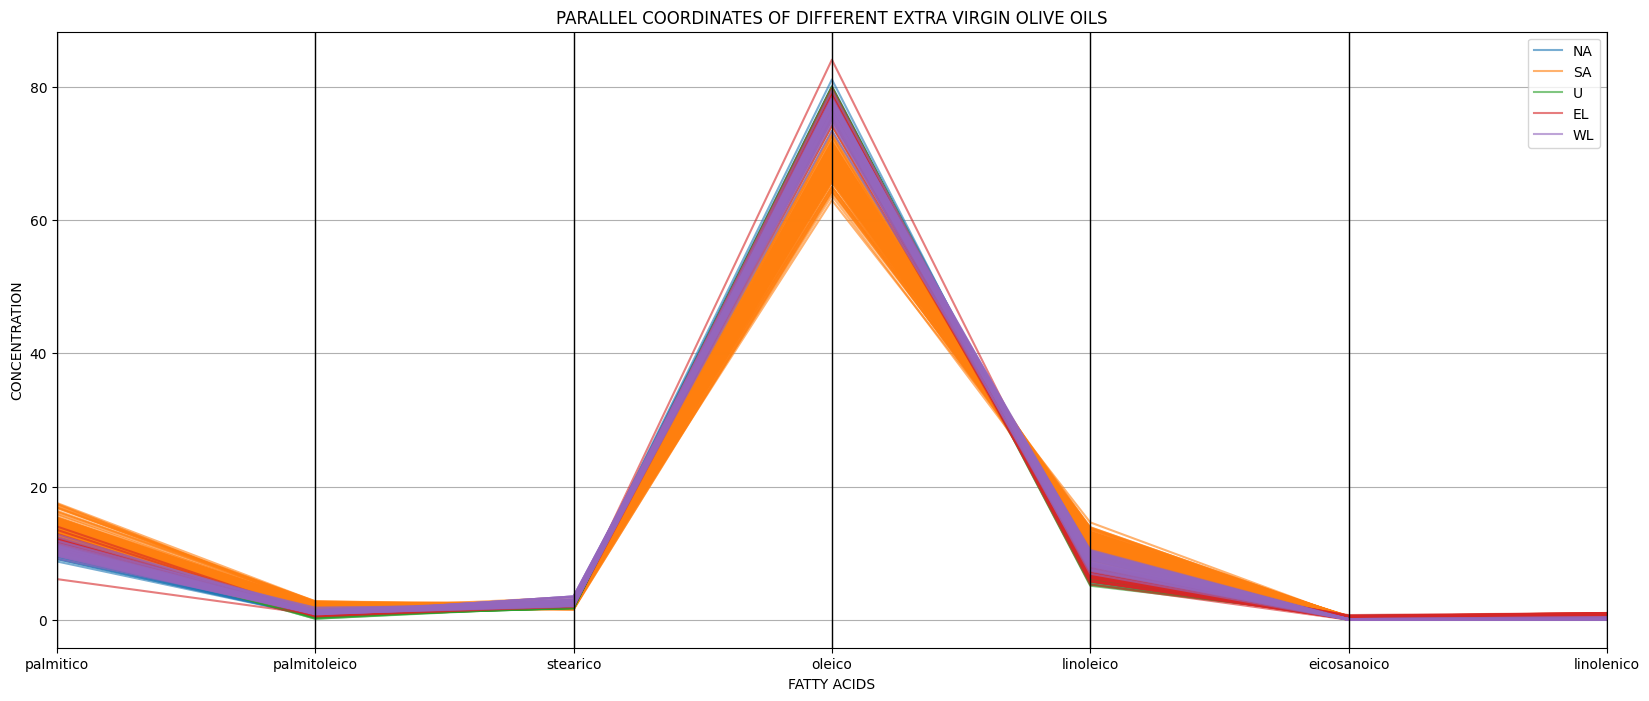

In [53]:
fig = plt.figure(figsize=(20, 8))

pd.plotting.parallel_coordinates(df, 'Categorie', cols=['palmitico', 'palmitoleico', 'stearico', 'oleico', 'linoleico', 'eicosanoico', 'linolenico'],
                                 color=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], alpha=0.6)

plt.grid(True)
plt.title('PARALLEL COORDINATES OF DIFFERENT EXTRA VIRGIN OLIVE OILS')
plt.ylabel('CONCENTRATION')
plt.xlabel('FATTY ACIDS')

- **Key discriminating variables:** Oleic acid stands out as the most informative for distinguishing regions such as Southern Apulia (orange), Eastern Liguria (red), and Western Liguria (purple). Palmitic and linoleic acids also help differentiate oils due to their wider range of concentrations.

- **Less informative variables:** Linolenic and eicosanoic acids are present at very low levels across all categories and show minimal variation, making them less useful for distinguishing oils. They appear very uniform and stable across regions. Stearic acid is also less discriminating, largely dominated by the purple category, likely due to its high variance.

- **Difficult-to-distinguish regions:** Umbria (green) and Northern Apulia (blue) are harder to separate, with only subtle traces in palmitic and oleic acid. In contrast, Southern Apulia and Liguria (east and west) remain clearly visible.

- **Potential correlations:** Oleic acid appears negatively correlated with linoleic acid. Categories with high oleic levels tend to have low linoleic concentrations. However, parallel coordinates provide only a unidimensional view, and further visualizations are recommended to confirm correlations.

# SCATTER MATRIX ANALYSIS

This scatter matrix provides a visual overview of relationships between variables in the dataset. It is particularly useful for identifying correlations—both linear and non-linear—detecting patterns or clusters, and spotting outliers that might affect statistical analyses.  

Each row and column corresponds to a variable, and each internal plot shows the relationship between a pair of variables. Diagonal plots typically display histograms or density estimates to illustrate each variable’s univariate distribution.  

Overall, the scatter matrix allows us to examine all pairwise relationships at once, making it a powerful tool for exploratory data analysis (EDA).

Text(0.5, 1.03, 'SCATTER PLOT MATRIX')

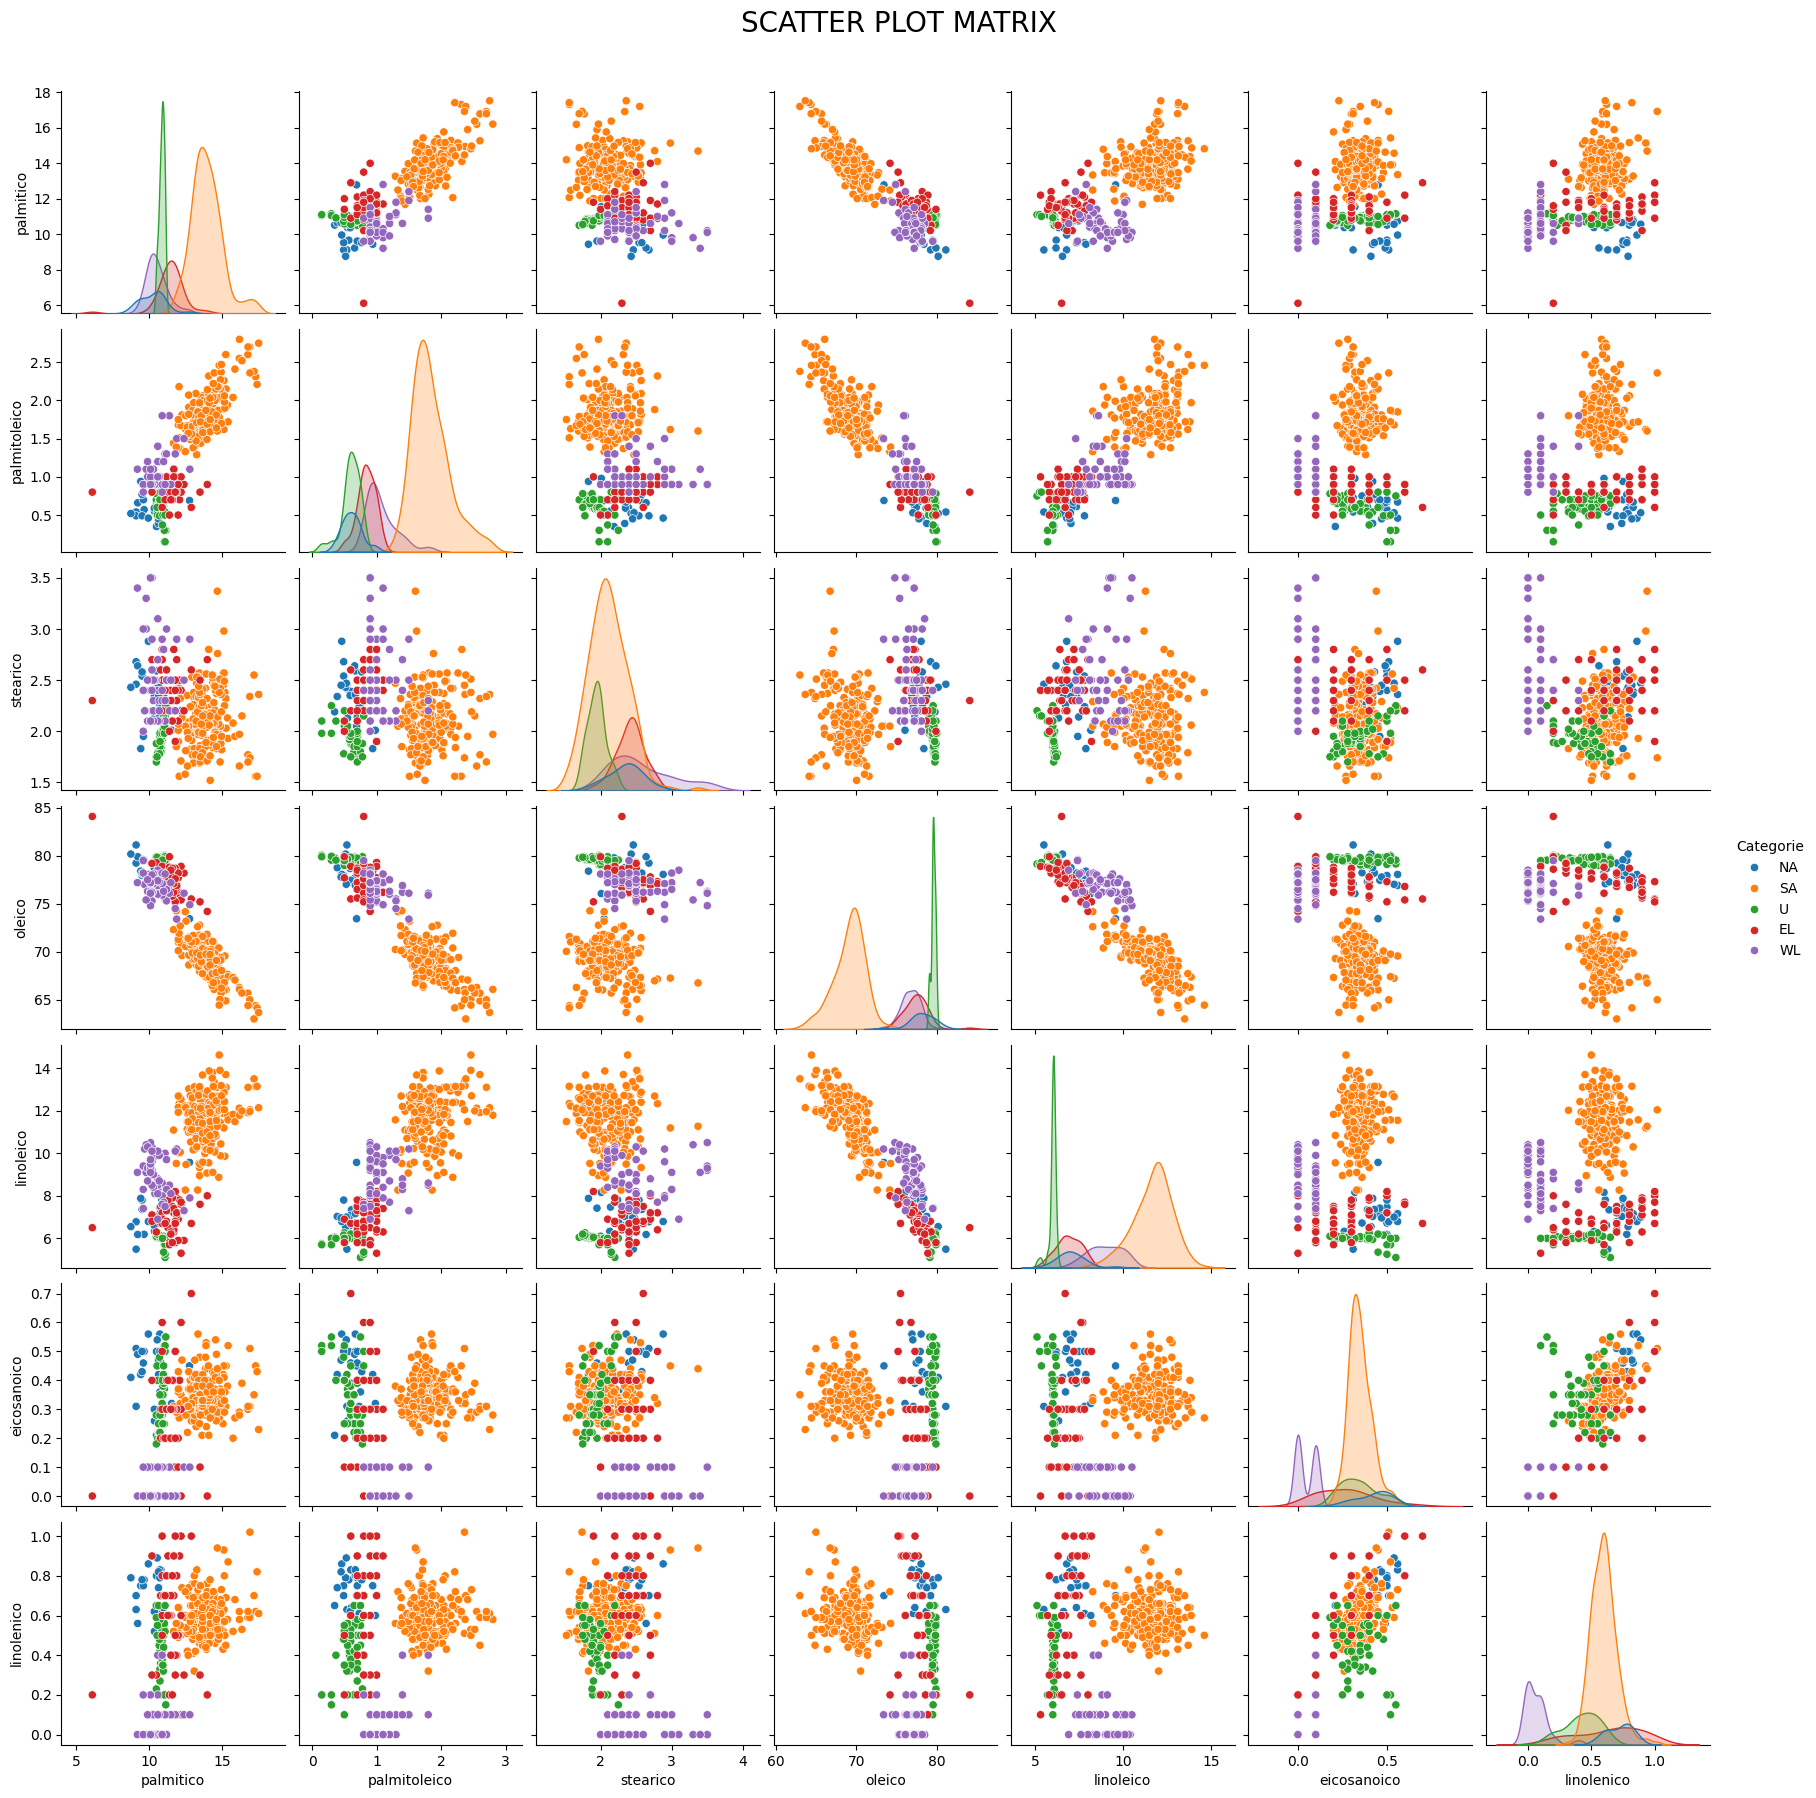

In [54]:
sns.pairplot(df, hue='Categorie')

plt.suptitle('SCATTER PLOT MATRIX', y=1.03, fontsize=20)

- **Distribution patterns:** No variable follows an overall normal distribution. Peaks are present due to different classes, and asymmetries are visible, especially in stearic acid, which shows a long right tail. Within categories, most distributions are unimodal and asymmetric, with some exceptions (e.g., palmitic acid in Umbrian oils). Certain curves are less distinct, such as eastern (red) and western (purple) Liguria, which are often similar.  

- **Regional differentiation:** Southern Apulia (orange) stands out clearly across plots due to its high variance, specific positions across fatty acids and higher frequencies in palmitoleic, stearic, eicosanoic and linolenic acids. Northern Apulia (blue) overlaps with other categories, making it harder to distinguish. Ligurian east and west areas show slightly more similar distributions compared to Apulia.  

- **Correlations:** Strong positive correlation is observed between palmitic and palmitoleic acids, with weaker correlation to linoleic acid. Oleic acid shows an inverse relationship with palmitic, palmitoleic, and linoleic acids; high oleic levels correspond to lower concentrations of these fatty acids, as clearly seen in Southern Apulia.  

- **Stability of certain acids:** Stearic, eicosanoic and linolenic acids show limited variation, with parallel coordinates and scatter plots indicating linear and stable distributions. These variables are less discriminating across categories, with more evident overlaps.  

- **Category-specific insights:** Umbrian oils are harder to identify visually but show lower variance and relatively high frequency peaks for palmitic, oleic and linoleic acids, suggesting that certain concentration ranges can indicate this region. Western Liguria dominates stearic acid distributions, with wider ranges emphasized by parallel coordinates, while scatter plots moderate this effect.  

Overall, these visualizations confirm that scatter plots and parallel coordinates are complementary, highlighting both stable patterns and distinct regional signatures across fatty acids.

# BIVARIATE ANALYSIS WITH SCATTERHIST

This visualization combines a **scatter plot with marginal histograms** to explore the relationship between two continuous variables while simultaneously showing their individual distributions.  

The central scatter plot displays data points as $(x, y)$ pairs, highlighting trends, correlations or outliers. Marginal histograms show the distribution of each variable separately. Together, they help answer questions such as: are there outliers affecting the correlation? Is the relationship linear, non-linear or absent? What is the distribution of each variable?  

**Benefits:** This approach combines univariate and bivariate analysis in a single plot, making it easy to spot data concentrations, outliers and interpret correlations visually.

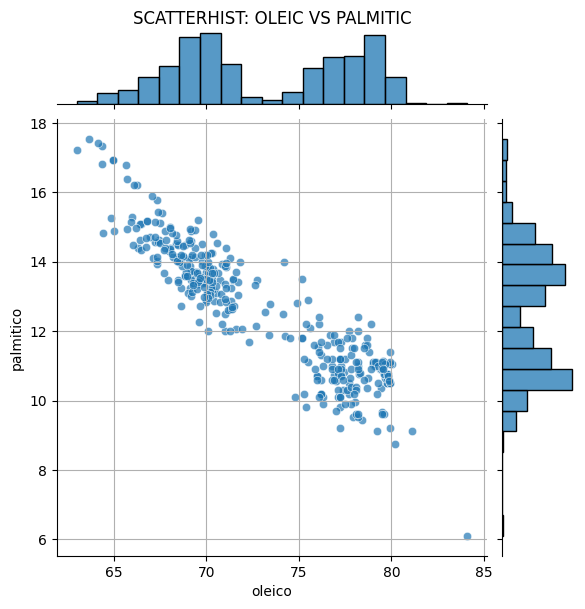

In [55]:
sns.jointplot(data= df, x= 'oleico', y= 'palmitico', kind= "scatter", marginal_kws=dict(bins=int(np.sqrt(len(df))), fill=True), alpha=0.7)
plt.title('SCATTERHIST: OLEIC VS PALMITIC', y=1.2)
plt.grid(True)

I selected **oleic** and **palmitic acids** for this scatter-hist plot because they best highlight the data dispersion.

Both histograms suggest a **bimodal trend**:  
- The horizontal histogram (oleic acid) has a main peak around 70 mg and a smaller one just below 80 mg, confirming the presence of two distinct groups.  
- The vertical histogram (palmitic acid) also shows slight bimodality, with peaks around 10–11 mg and 14 mg.  

The scatter plot reveals **two clear clusters**, indicating two macro-groups in the dataset distinguished mainly by fatty acid concentrations. Additionally, a point isolated in the lower-left corner may represent a potential outlier.  

This visualization effectively highlights group structures and potential anomalies in the data.

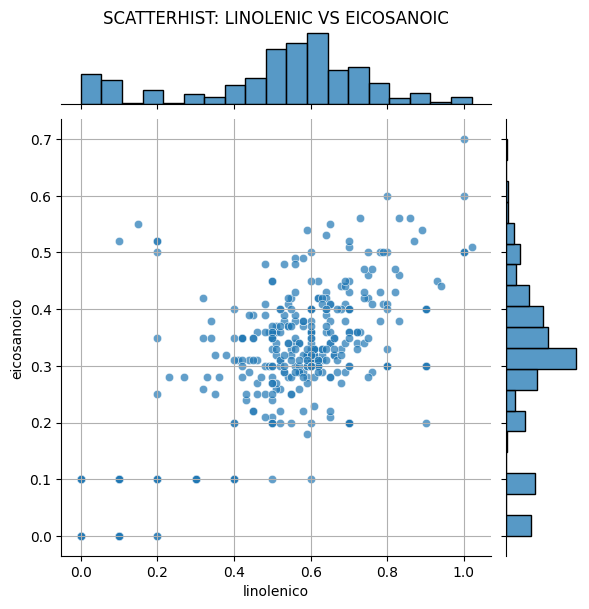

In [56]:
sns.jointplot(df, x='linolenico', y='eicosanoico', kind="scatter", marginal_kws=dict(bins=int(np.sqrt(len(df))), fill=True), alpha=0.7)
plt.title('SCATTERHIST: LINOLENIC VS EICOSANOIC', y=1.2)
plt.grid(True)

In contrast to the previous plot, this scatterhist focuses on **linolenic** and **eicosanoic acids** to illustrate a case with lower dispersion and less obvious patterns. As expected, the plot provides less distinctive information due to the more contained spread of the data.  

Both distributions are **unimodal**, peaking around **0.6 mg** for linolenic and **0.3 mg** for eicosanoic acid. No clear correlation is observed, as points are fairly scattered, indicating the absence of a strong linear relationship.  

A central concentration of points is visible, with a few isolated observations at the lower end, possibly suggesting a small subgroup of anomalies.  

Overall, this plot confirms the hypothesis: no well-defined groups are present, and patterns are less pronounced compared to the first scatterhist.

# FREQUENCY DISTRIBUTION ANALYSIS WITH HISTOGRAMS

In this plot, I use **histograms** to explore the distribution of values within each variable. Histograms help quickly understand the shape of the data, spot outliers and see where values are concentrated.  

Each histogram divides the range of a variable into **bins** and counts how many observations fall into each bin. Taller bars indicate intervals with more data, while the overall shape provides insights into the statistical distribution.

Text(0.5, 1.0, 'FREQUENCY HISTOGRAM: PALMITIC ACID')

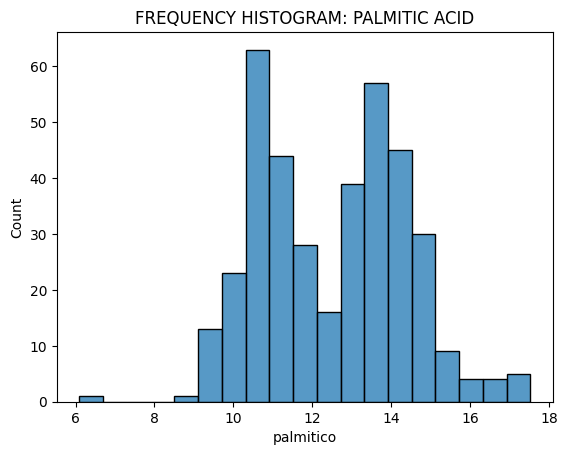

In [57]:
sns.histplot(df['palmitico'], bins=int(np.sqrt(len(df))), kde=False)
plt.title('FREQUENCY HISTOGRAM: PALMITIC ACID')

The histogram of palmitic acid highlights features that were less obvious in the initial scatter-histogram. A clear **primary peak** appears around 10 mg, with a smaller secondary peak near 14 mg, suggesting the presence of multiple groups within the distribution. A potential **outlier** is also noticeable at low concentrations.  

Overall, the distribution is **asymmetric**, ranging from 6 mg to 18 mg. Both tails are relatively flat, indicating that extreme concentrations of palmitic acid are rare in this sample.

Text(0.5, 1.0, 'FREQUENCY HISTOGRAM: PALMITOLEIC ACID')

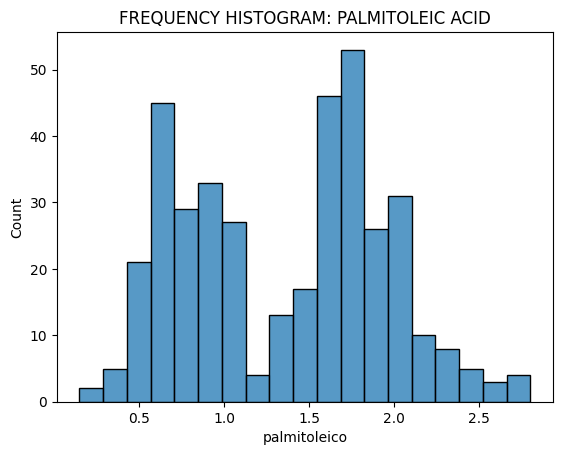

In [58]:
sns.histplot(df['palmitoleico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('FREQUENCY HISTOGRAM: PALMITOLEIC ACID')

The distribution ranges from just above 0 mg to under 3 mg and appears **asymmetric and bimodal**. The main peak lies between 1.5 mg and 2.0 mg, while a smaller secondary peak occurs around 0.5 mg.  

The presence of these two peaks suggests the existence of **multiple groups within the population**. No obvious outliers are observed in this distribution.

Text(0.5, 1.0, 'FREQUENCY HISTOGRAM: STEARIC ACID')

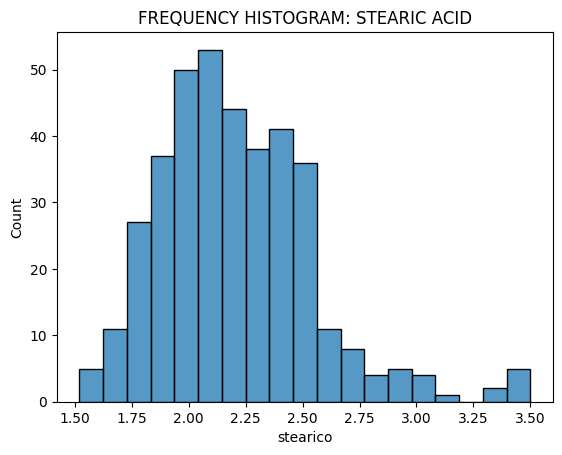

In [59]:
sns.histplot(df['stearico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('FREQUENCY HISTOGRAM: STEARIC ACID')

The concentration of stearic acid ranges from about 1.5 mg to just under 3.5 mg and shows a **unimodal distribution**, with the mode between 2.0 mg and 2.25 mg. Most olive oils fall within 1.75–2.5 mg, with minor secondary peaks around the mode. A small group of observations with concentrations above 3.25 mg appears as a separate cluster.  

Compared to other fatty acids, this distribution is **the closest to normal**, showing minimal skewness. Unlike palmitic and palmitoleic acids, clear clustering is not evident, suggesting overall homogeneity.  

Looking in more detail (e.g., via scatter matrices), **Southern Apulia** plays a dominant role, shaping the distribution. This occurs because there is notable overlap between Southern Apulia and other subgroups, creating a smoother, more sinuous distribution.

Text(0.5, 1.0, 'FREQUENCY HISTOGRAM: OLEIC ACID')

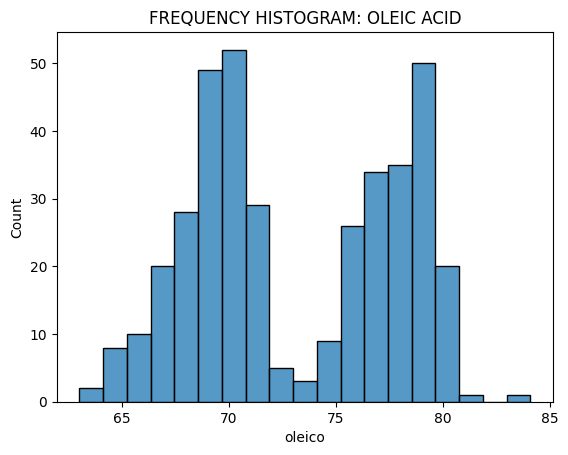

In [60]:
sns.histplot(df['oleico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('FREQUENCY HISTOGRAM: OLEIC ACID')

Among the fatty acids, **oleic acid stands out due to its high concentration**. Its values range from just under 65 mg to nearly 85 mg, showing a unimodal but asymmetric distribution centered around 70 mg.  

Two main subgroups of data are clearly identifiable, separated around 73 mg, and within each subgroup, several secondary peaks emerge. There is also a suspected outlier above 80 mg.  

Overall, oleic acid proves to be a key variable for highlighting distinct data classes within the dataset, making patterns and groupings more apparent.

Text(0.5, 1.0, 'FREQUENCY HISTOGRAM: LINOLEIC ACID')

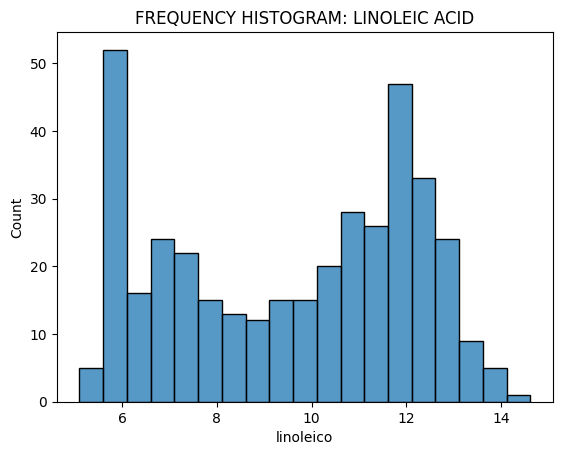

In [61]:
sns.histplot(df['linoleico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('FREQUENCY HISTOGRAM: LINOLEIC ACID')

The linoleic acid values range roughly from 5 mg to just over 14 mg, showing an asymmetric, unimodal distribution with a main mode around 6 mg. Two broad subgroups of data can be distinguished, although the boundary between them is less defined and appears somewhat “blurred.” A secondary peak is noticeable around 12 mg, highlighting an additional concentration of values.

Text(0.5, 1.0, 'FREQUENCY HISTOGRAM: EICOSANOIC ACID')

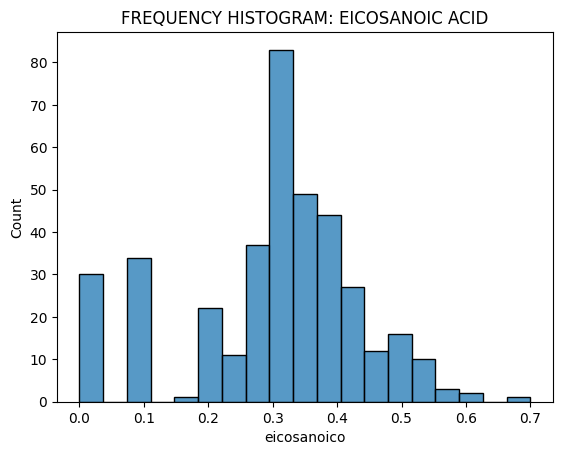

In [62]:
sns.histplot(df['eicosanoico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('FREQUENCY HISTOGRAM: EICOSANOIC ACID')

The distribution of **linoleic acid** is highly discrete, with values mostly between 0 mg and 0.7 mg. It shows a **unimodal, skewed pattern**, peaking around 0.3 mg. Interestingly, the histogram suggests more than two distinct categories of olive oils, which was somewhat unexpected.  

In contrast, **eicosanoic acid** appears less informative across the other plots and is among the **least concentrated fatty acids** in extra virgin olive oils.

Text(0.5, 1.0, 'FREQUENCY HISTOGRAM: LINOLENIC ACID')

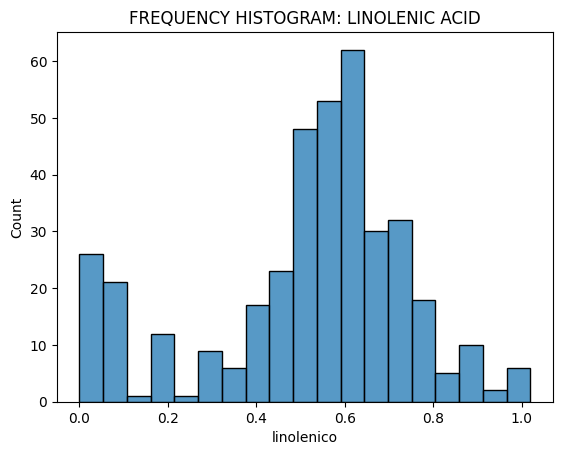

In [63]:
sns.histplot(df['linolenico'], bins=int(np.sqrt(len(df))), kde=False)

plt.title('FREQUENCY HISTOGRAM: LINOLENIC ACID')

The distribution of **linolenic acid** ranges from 0 mg to 1.0 mg and shows a **unimodal, skewed pattern**, with a peak around 0.6 mg. Most values are concentrated near the mode, indicating a strong central tendency.  

Compared to the previous plot, there is less evidence of multiple categories. Along with **eicosanoic acid**, linolenic acid is generally present in low amounts in olive oils.

# BOXPLOT

I use a **boxplot** to explore the distribution of the dataset's numeric variables. This visualization compactly summarizes the **median, variability and potential outliers**.  

The central line shows the median, the box covers the interquartile range (Q1–Q3), and the whiskers extend to the range of typical values. Points outside the whiskers represent outliers, highlighting unusual or extreme observations.  

Boxplots make it easy to compare distributions across variables or groups, reveal symmetry or skewness and quickly spot anomalies.

Text(0.5, 1.0, 'BOXPLOT OF PALMITIC ACID BY REGION')

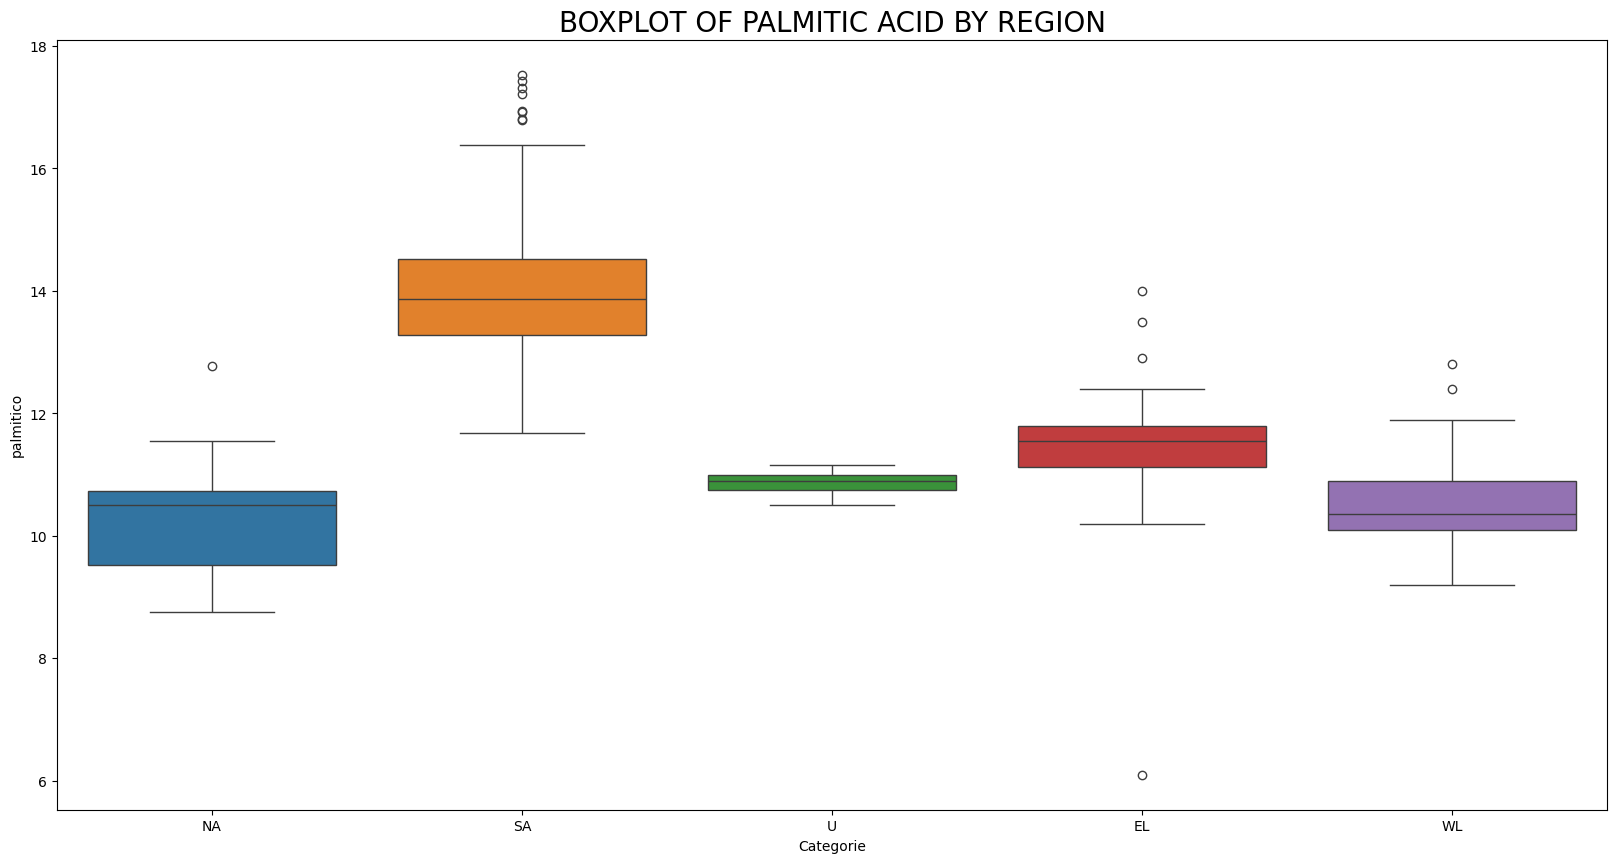

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='palmitico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title('BOXPLOT OF PALMITIC ACID BY REGION', fontsize=20)

By moving from a global view of distributions to a region-specific perspective, we can see interesting differences:

- **Umbria (U):** The most symmetric distribution, with the median perfectly dividing the box and no outliers. A slight left skew is suggested by the longer lower whisker, but overall values are tightly clustered, giving a very flat boxplot.  

- **Southern Apulia (SA):** Similar symmetry, but with a slightly longer upper whisker and clear outliers extending upward. This region also shows relatively high variance.  

- **Northern Apulia (NA):** Strongly left-skewed, with the median shifted toward the upper whisker. Interestingly, despite the negative skewness, an outlier appears on the right side, while the box remains well-centered. Variance is again high, comparable to SA.  

- **Eastern Liguria (EL):** Displays outliers on both sides, with a longer tail to the left. Variance is moderate, not as low as Umbria but lower than SA and NA.  

- **Western Liguria (WL):** The only positively skewed distribution, with the median shifted left and outliers on the right. Variance remains at a moderate level.  

**Conclusion:** By comparing box positions and whisker lengths, we see that **palmitic acid clearly separates Southern Apulia (SA) from the other regions**, while Umbria, Liguria and Northern Apulia show overlapping distributions that are harder to distinguish.


Text(0.5, 1.0, 'BOXPLOT OF PALMITOLEIC ACID BY REGION')

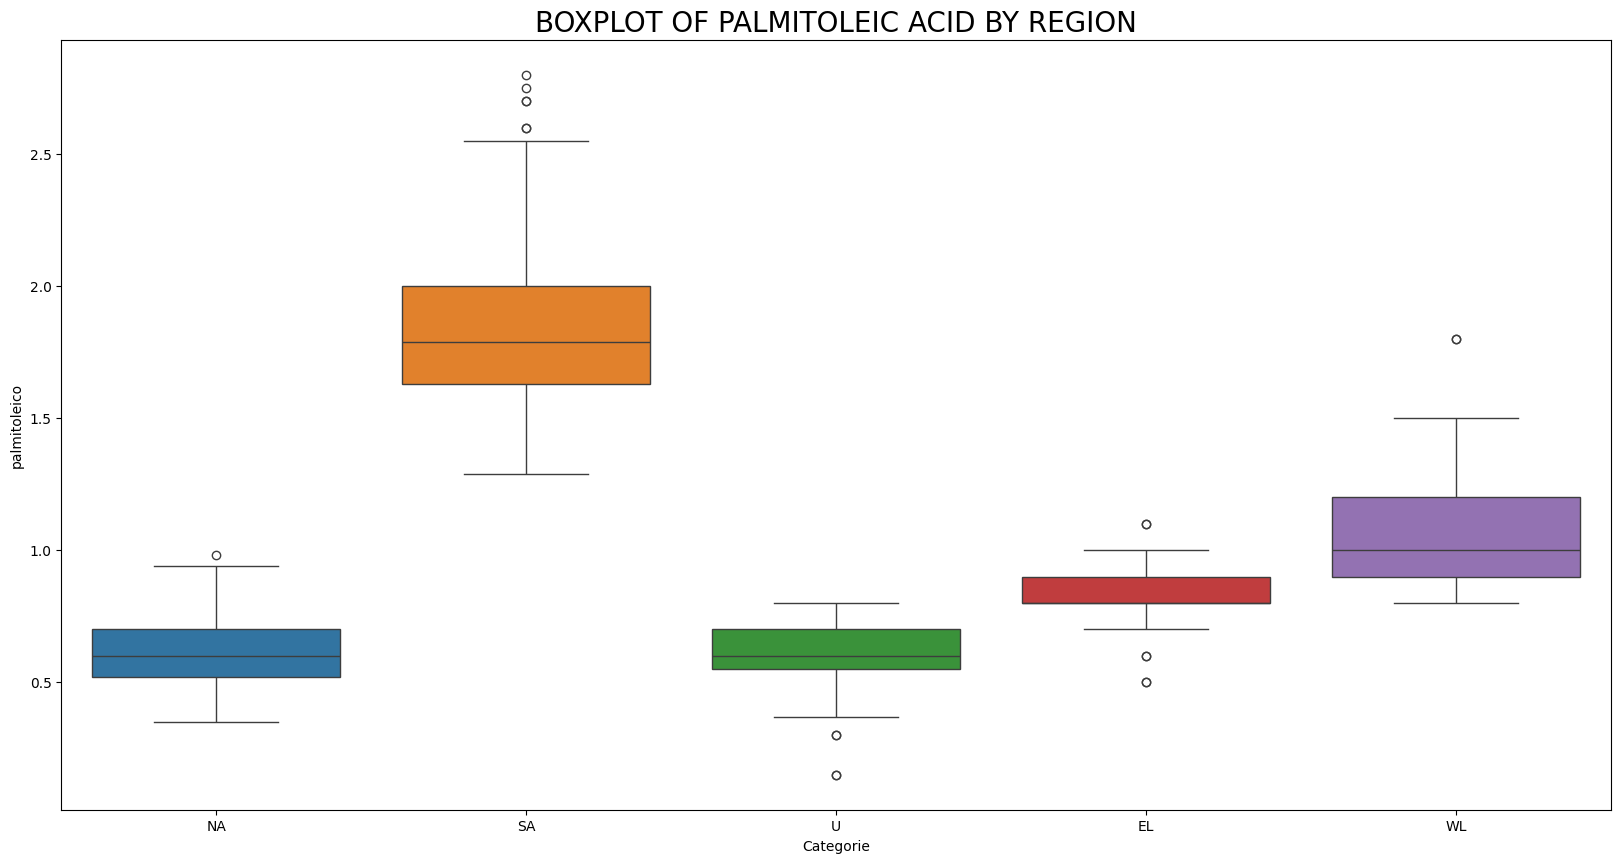

In [65]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='palmitoleico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT OF PALMITOLEIC ACID BY REGION", fontsize=20)

No region shows a perfectly symmetric distribution for palmitoleic acid.  

- **Udine (U):** Previously symmetric with palmitic acid, it now displays a negatively skewed distribution, with a long left tail and two outliers. The median is shifted leftward, an unusual feature for negatively skewed data.  

- **Southern Apulia (SA):** Its strong positive skewness becomes particularly evident here. The median lies near the lower edge of the box, with a long right tail and several outliers, confirming its high variance.  

- **“Blue” region:** Appears more compressed compared to palmitic acid, with the median slightly shifted left. Its single outlier remains unchanged.  

- **Eastern Liguria (EL):** Shows a marked change. While it previously had many high-value outliers, it now exhibits the opposite. The median nearly coincides with a box edge, and the region now has the smallest variance among all groups.  

- **Western Liguria (WL):** Displays little change, aside from increased variance. It continues to show strong positive skewness, with the median shifted left, outliers on the right, and a more pronounced right tail.  

**Conclusion:** As with palmitic acid, palmitoleic acid highlights the distinctive profile of Southern Apulia, while the other regions largely overlap and remain harder to differentiate.

Text(0.5, 1.0, 'BOXPLOT OF STEARIC ACID BY REGION')

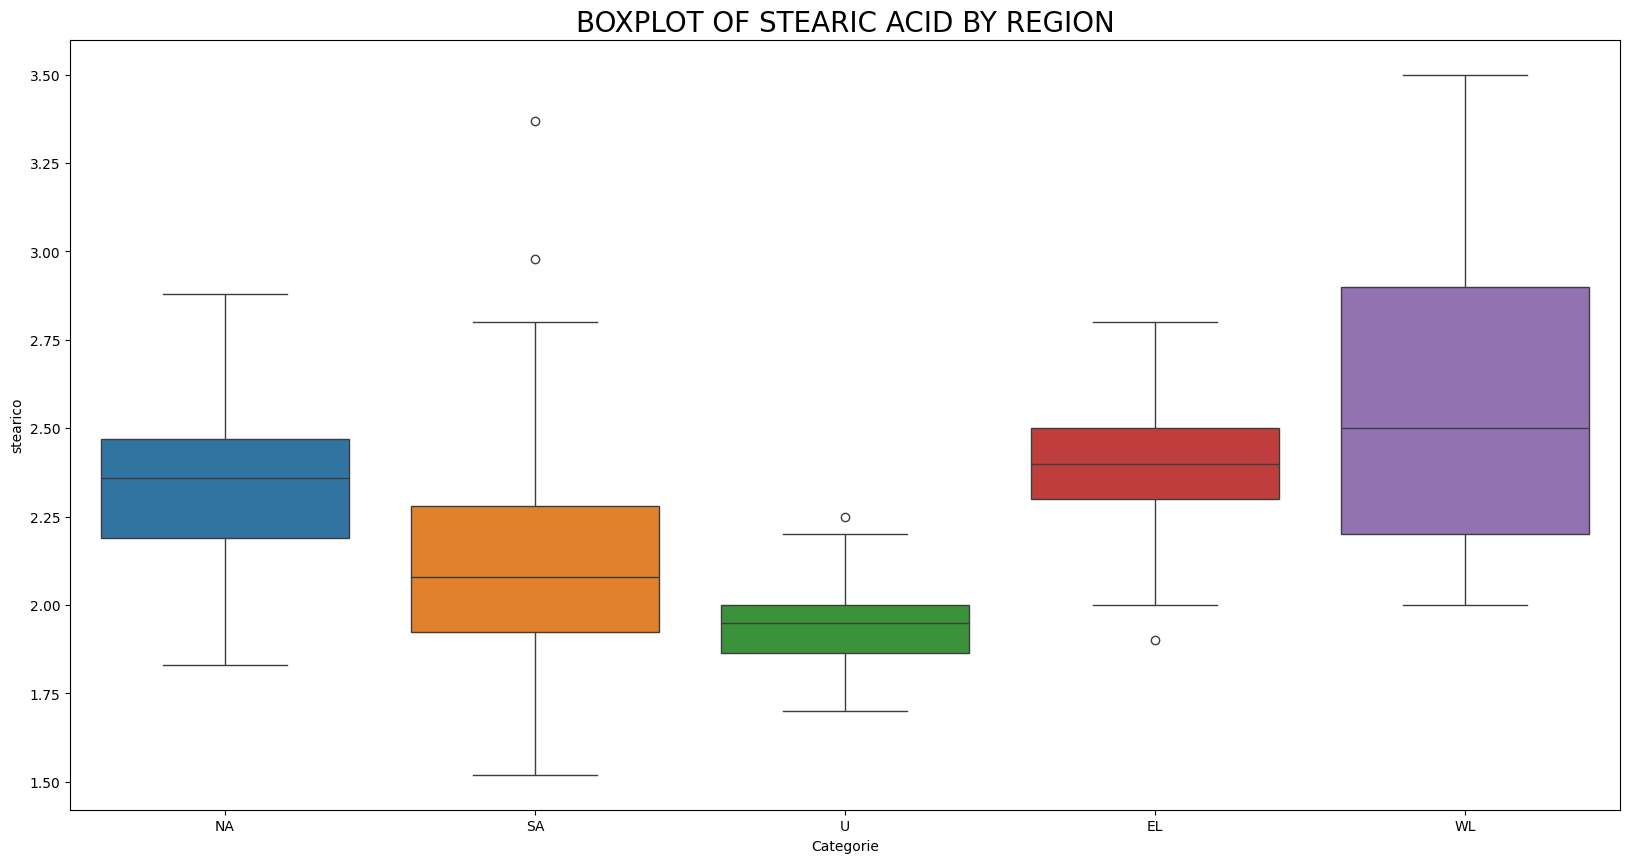

In [66]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='stearico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT OF STEARIC ACID BY REGION", fontsize=20)

No region shows a perfectly symmetric distribution for stearic acid.  

The **green distribution (Umbria)** displays traits of both skew types: the median is shifted to the right, suggesting negative skewness, while high-value outliers point to positive skewness.  

The overall “wavy” shape of the total distribution is mainly driven by **SA (orange)** and **WL (purple)**. SA shows a wide spread concentrated in the lower–mid range of stearic acid, covering most other regions. In contrast, the upper tail is dominated by WL, which reaches the highest concentrations. Despite its wide spread, the SA boxplot remains fairly stable, with only minor influence from a few outliers.  

The **blue region** shows increased variance but no outliers, while **eastern Liguria** would be nearly symmetric if not for a single low extreme value.  

Finally, **western Liguria** displays one of the broadest distributions, with a notable increase in variance. This is consistent with the dominance of purple lines in the parallel coordinates plot.  

Overall, unlike the first two fatty acids, **stearic acid distributions are largely overlapping across regions**, reflecting their similar concentration levels.


Text(0.5, 1.0, 'BOXPLOT OF OLEIC ACID BY REGION')

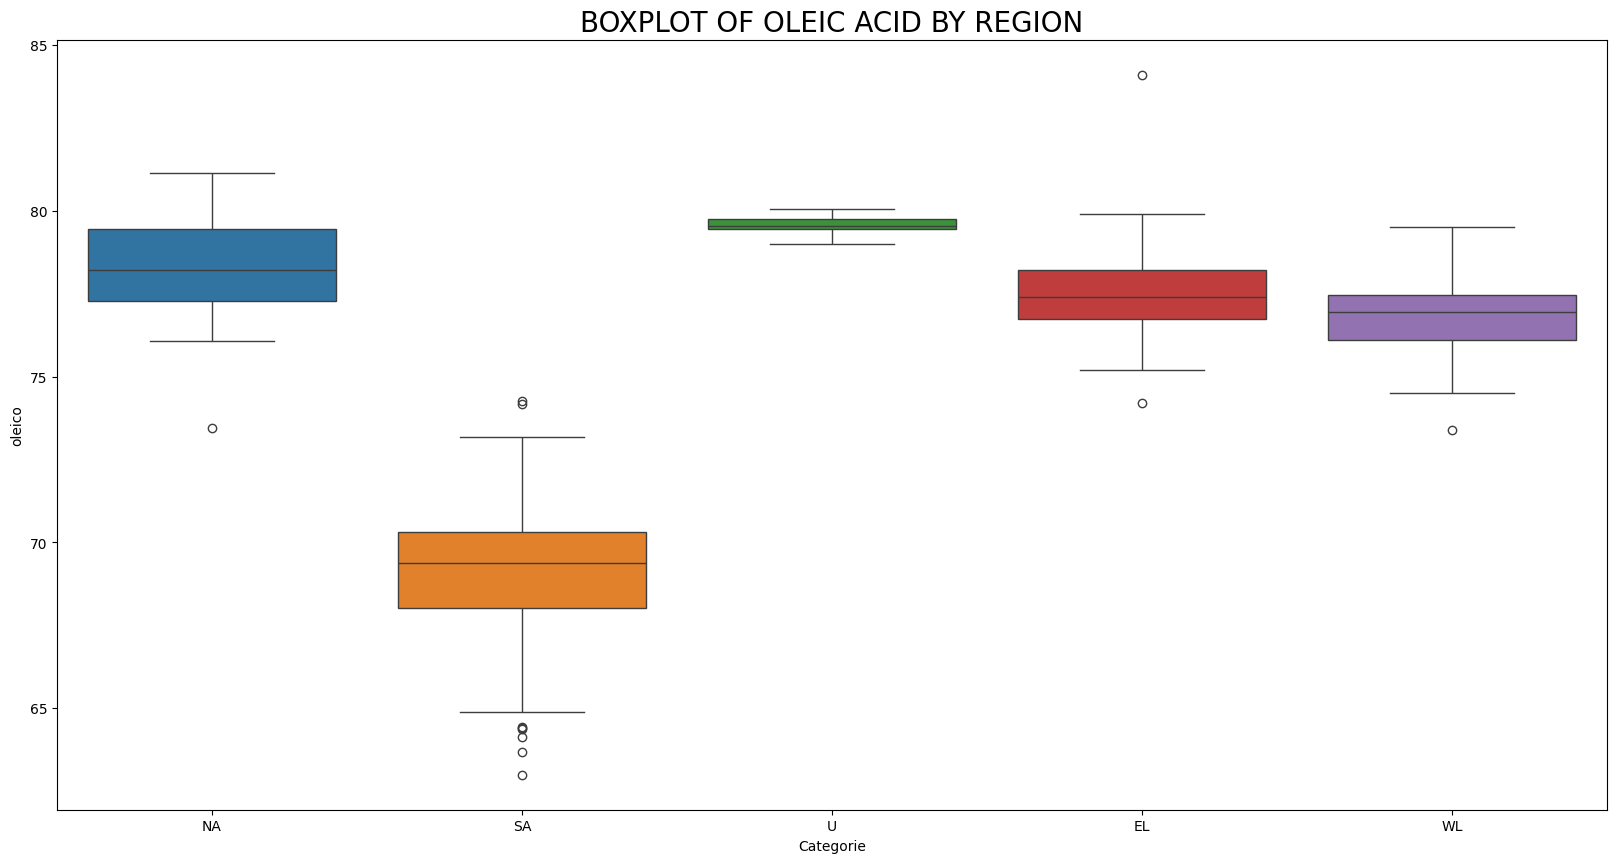

In [67]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='oleico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT OF OLEIC ACID BY REGION", fontsize=20)

The distribution of **oleic acid** does not appear symmetric in any region. Interestingly, the pattern observed for **palmitic** and **palmitoleic acids** seems reversed here: regions with high values of those acids show low levels of oleic acid, and vice versa. This inverse relationship was already suggested by the parallel coordinates and the scatter plot matrix.

The **Umbria distribution** regains a shape similar to its initial one, though with less symmetry, as the median shifts to the left within the box.  
For **stearic acid (SA)**, we observe a clear departure from the other regions: its skewness changes from positive to negative, with the addition of a single left-side outlier. In the parallel coordinates, this is highlighted by the dominance of orange lines due to the long left tail.

When comparing **oleic acid** to **palmitoleic acid**, the “blue” region shows an inverted pattern, except for the median, which still sits near the lower edge of the box. The “red” distribution, if not for extreme values at both ends, would appear more symmetric overall.  

No particular anomalies are seen for **Western Liguria (WL)**, which remains the clearest example of negative skewness.  

Finally, regarding **regional separability**, the results for oleic acid confirm earlier findings: **Southern Apulia (SA)** stands out with a distribution that is clearly distinct and not overlapping with the other regions.

Text(0.5, 1.0, 'BOXPLOT OF LINOLEIC ACID BY REGION')

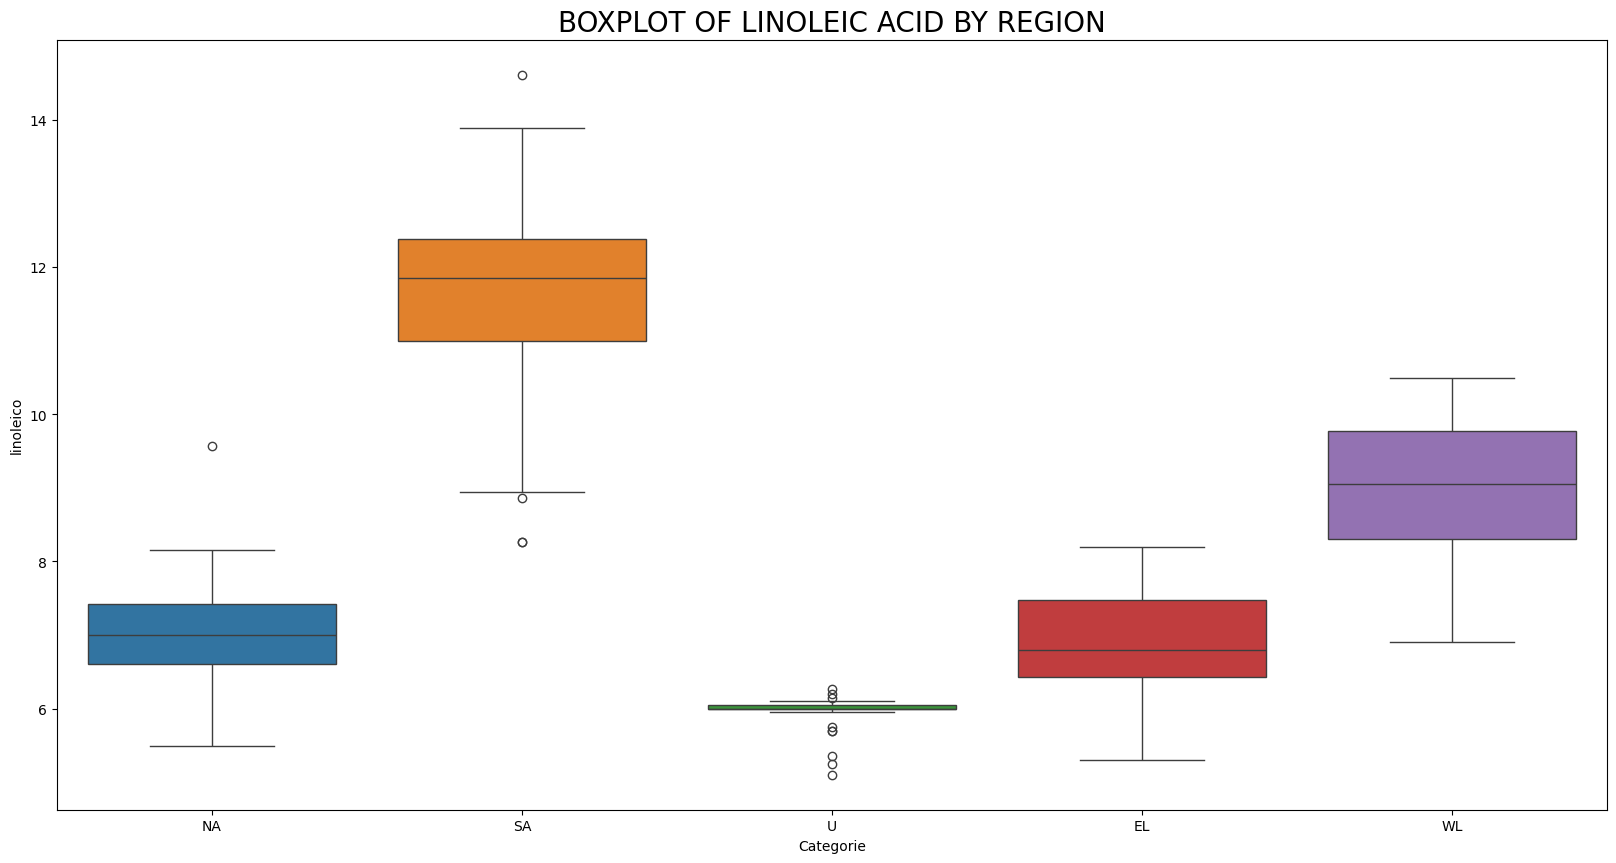

In [68]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='linoleico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT OF LINOLEIC ACID BY REGION", fontsize=20)

All regions tend to cluster at the lower end, except for SA, which stands out at the top. As in previous cases, no symmetric distributions are observed.  

U remains particularly interesting: its distribution is the most compressed, with whiskers so close that the median line is barely visible, while multiple outliers appear on both sides.  

SA shows a clear separation from the other regions, but its skewness shifts from positive to negative with the presence of a single high outlier.  

NA displays an unusual pattern: despite having a longer left tail (negative skewness), its mean and median coincide (suggesting symmetry), while a single high outlier reflects positive skewness.  

For the first time, the red distribution appears without outliers.  
WL (Western Liguria) continues to show a clear negative skewness, while no major changes or overlaps emerge across the other regions.

Text(0.5, 1.0, 'BOXPLOT OF EICOSANOIC ACID BY REGION')

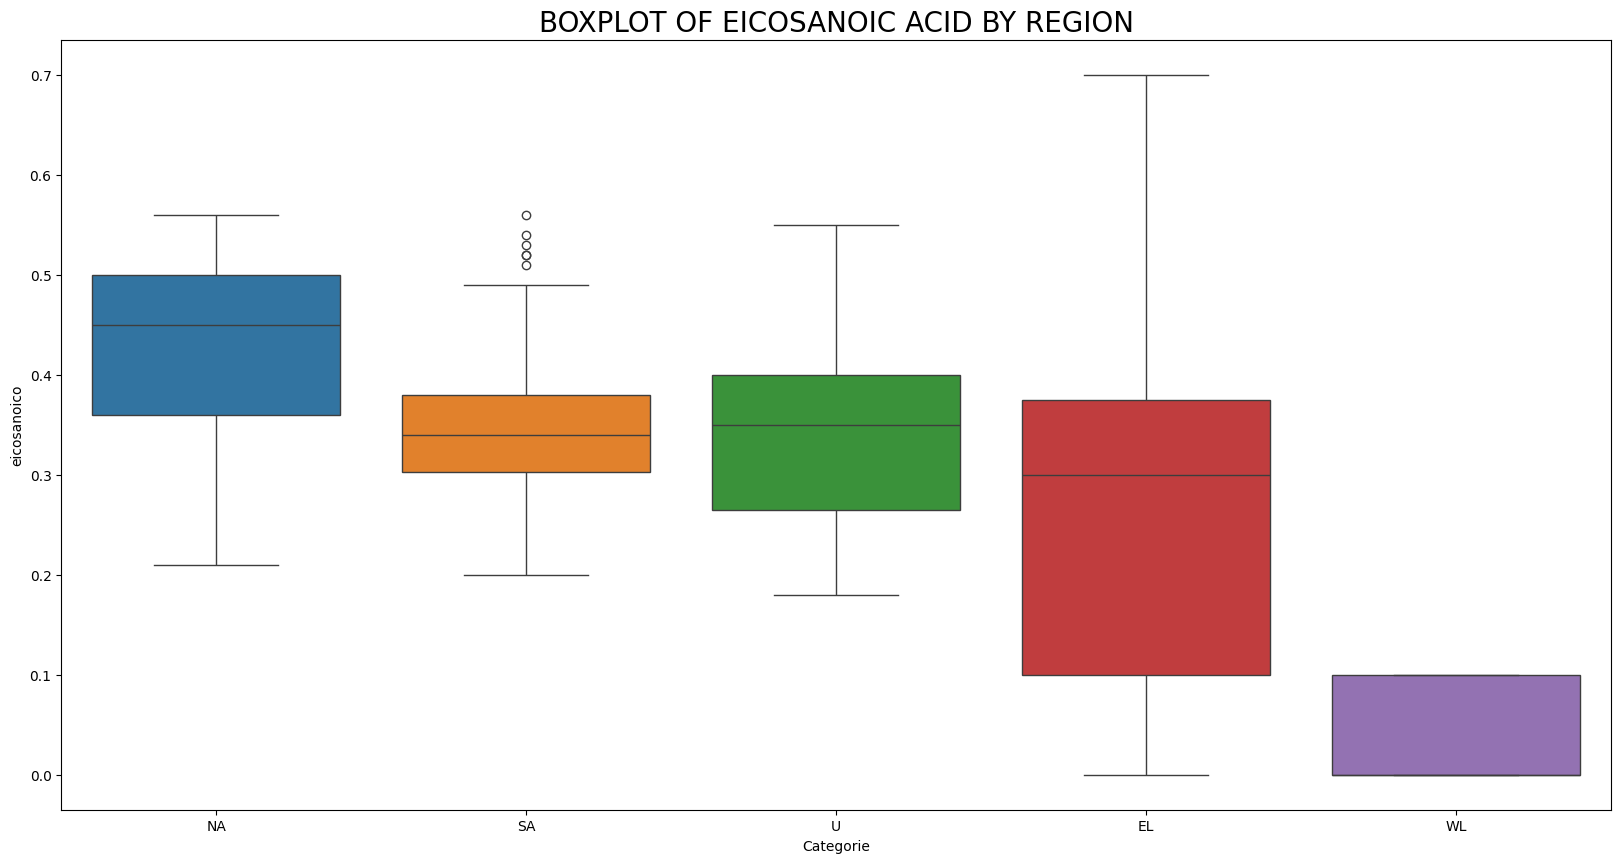

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='eicosanoico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT OF EICOSANOIC ACID BY REGION", fontsize=20)

This plot shows a strong concentration of observations within a narrow range (0.0 mg–0.7 mg). At first glance, the box sizes might suggest high variance across regions, but in reality their widths are minimal compared to other fatty acids.  

Some key insights emerge:  
- Outliers are largely absent, except in the orange distribution.  
- Western Liguria (WL) behaves unusually for the first time, while Southern Apulia (SA) aligns with the other groups.  
- Umbria (U) and Eastern Liguria (EL) show similar patterns, differing mainly in variance.  
- SA is no longer detached from the rest, regains positive skewness, and is the only group with visible outliers.  
- Northern Apulia (NA) replaces W` as the clearest asymmetric distribution.  
- The **red distribution** dominates the plot, masking others, though it resembles the green one in shape (both with medians near the upper edge and a long right tail).  
- The **purple box** sits lower, with collapsed whiskers and no visible median.  

**Conclusion:** The red distribution overwhelms the plot, making other regions less distinguishable. Removing it would highlight WL more clearly.

Text(0.5, 1.0, 'BOXPLOT OF LINOLENIC ACID BY REGION')

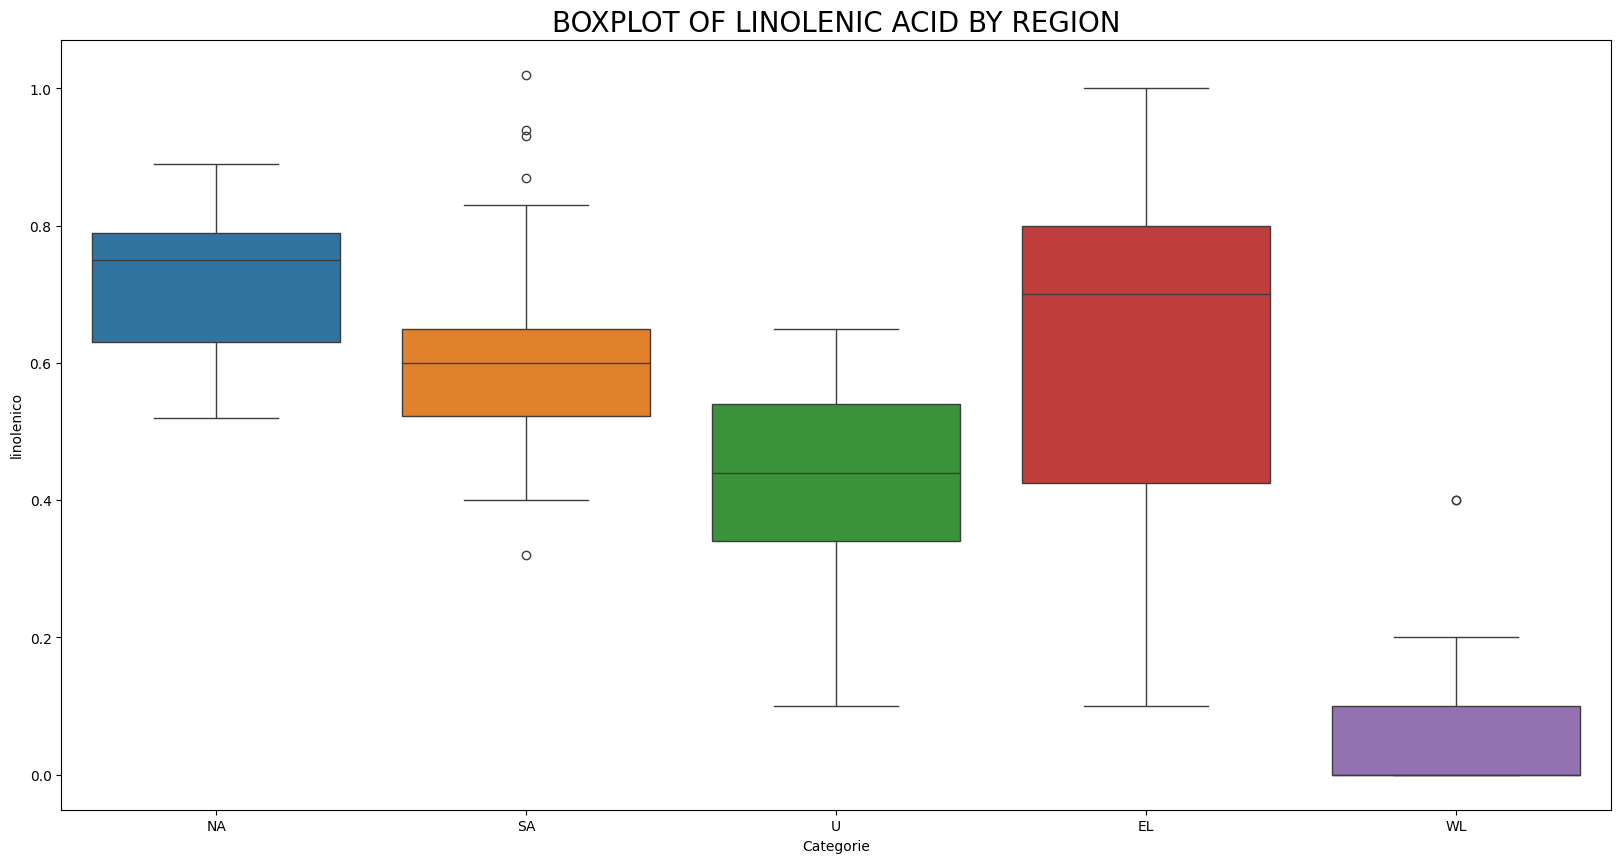

In [70]:
plt.figure(figsize=(20,10))
sns.boxplot(df, x='Categorie', y='linolenico', palette=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'], hue='Categorie')
plt.title("BOXPLOT OF LINOLENIC ACID BY REGION", fontsize=20)

Like eicosanoic acid, **linolenic acid** is present only in small amounts, ranging from 0 mg to about 1.0 mg. The overall boxplot patterns are similar to those observed previously, but the case of **Western Liguria (WL)** stands out.  

Here, the lower whisker touches the minimum bound, giving the box a distinctive shape. This suggests that linolenic acid may act as a **discriminating variable** for oils from this region, highlighting its potential role in differentiating geographic origins.

# HEATMAP

A heatmap provides a quick, color-based view of large numeric datasets. Rows and columns represent two dimensions of the data (e.g., variables vs observations), while each cell is shaded according to its value.  

This makes it easy to spot high- or low-intensity regions, overall patterns such as clusters or gradients, and possible anomalies. The choice of colormap is important, since different palettes can either highlight or hide key structures.  

When needed, scaling the data can further enhance interpretation. Overall, heatmaps are an intuitive and compact way to explore correlations and similarities in complex datasets.

Text(0.5, 1.0, 'IMAGES/HEATMAP BEFORE NORMALISATION')

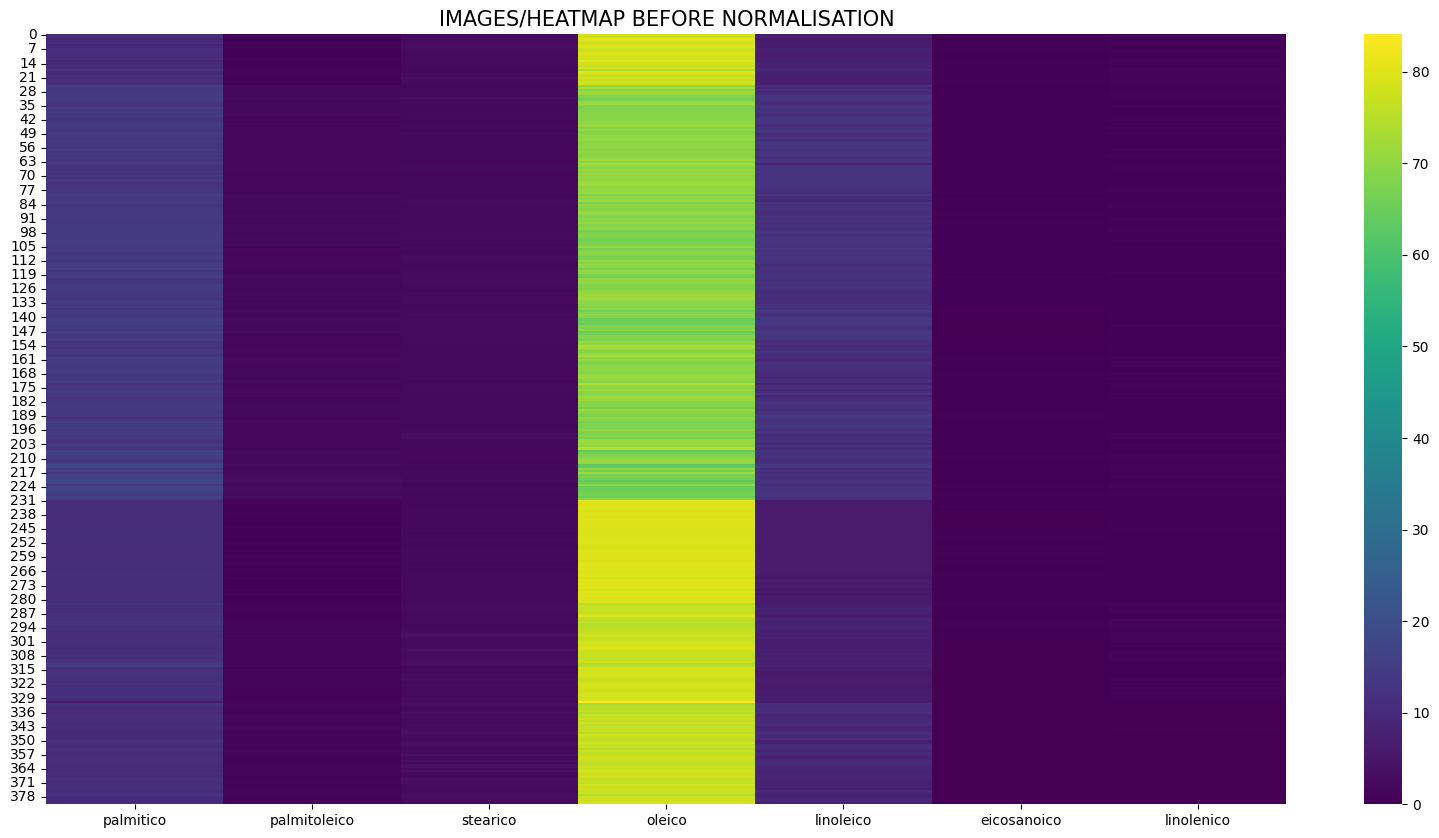

In [71]:
plt.figure(figsize=(20,10))

sns.heatmap(df.drop(columns='Categorie', axis=1), cbar=True, cmap='viridis')

plt.title('IMAGES/HEATMAP BEFORE NORMALISATION', fontsize=15)

The most abundant fatty acid is **oleic acid**, with concentrations above 60 mg, while the others rarely exceed 20 mg. **Palmitic, stearic, eicosanoic and linolenic acids** are the least concentrated, with the last two approaching near-zero levels. Their similar coloring suggests a possible correlation. A comparable relationship also appears between **palmitic and linoleic acids**, as both fall within a similar range... a pattern confirmed by the scatter matrix.  

Oleic acid stands out as the **most informative variable for distinguishing origins**. Its heatmap column shows a wider range of colors compared to the others, including a distinct “valley” between the 30th and 230th samples where concentrations drop significantly (visible as a dark green band interrupting the dominant yellow). Similar though less pronounced dips can be seen for linoleic acid.  

By contrast, **stearic acid** displays a nearly uniform tone, reflecting its relative homogeneity. The last two acids also appear consistently dark, but this effect is partly due to the lack of normalization, which masks finer variations.  

Overall, the heatmap highlights oleic acid as the key differentiator, while also revealing subtle groupings and correlations among the minor fatty acids.

**DATA NORMALIZATION**

Features with larger numeric values may dominate the visualization and obscure meaningful patterns.  

MinMaxScaler, from **scikit-learn** applies a linear transformation that rescales each variable into a defined interval, typically $[0, 1]$, according to the formula:

$$
X_{scaled} = (X - X_{min})/(X_{max} - X_{min})
$$

- $X$: original value
- $X_{min}, X_{max}$: minimum and maximum of the variable
- $X_{scaled}$: normalized value in $[0, 1]$ 

This way, all features become directly comparable, improving **interpretability**, ensuring **numerical stability**, and making multivariate plots (such as parallel coordinates) much clearer and more balanced.


In [72]:
norm = MinMaxScaler()
norm

MinMaxScaler()

In [73]:
norm.fit(df.drop(columns='Categorie', axis=1))

dfNorm = norm.transform(df.drop(columns='Categorie', axis=1))
dfNorm

array([[0.40682411, 0.22641509, 0.37373737, ..., 0.17016807, 0.51428571,
        0.58823529],
       [0.41819769, 0.21886792, 0.36363636, ..., 0.28466387, 0.44285714,
        0.59803922],
       [0.26334197, 0.14716981, 0.47474747, ..., 0.04096639, 0.44285714,
        0.61764706],
       ...,
       [0.34995622, 0.28301887, 0.29292929, ..., 0.48319328, 0.        ,
        0.        ],
       [0.33245833, 0.39622642, 0.49494949, ..., 0.37815126, 0.14285714,
        0.09803922],
       [0.30621178, 0.24528302, 0.44444444, ..., 0.24159664, 0.14285714,
        0.19607843]])

Text(0.5, 1.0, 'IMAGES/HEATMAP AFTER NORMALISATION')

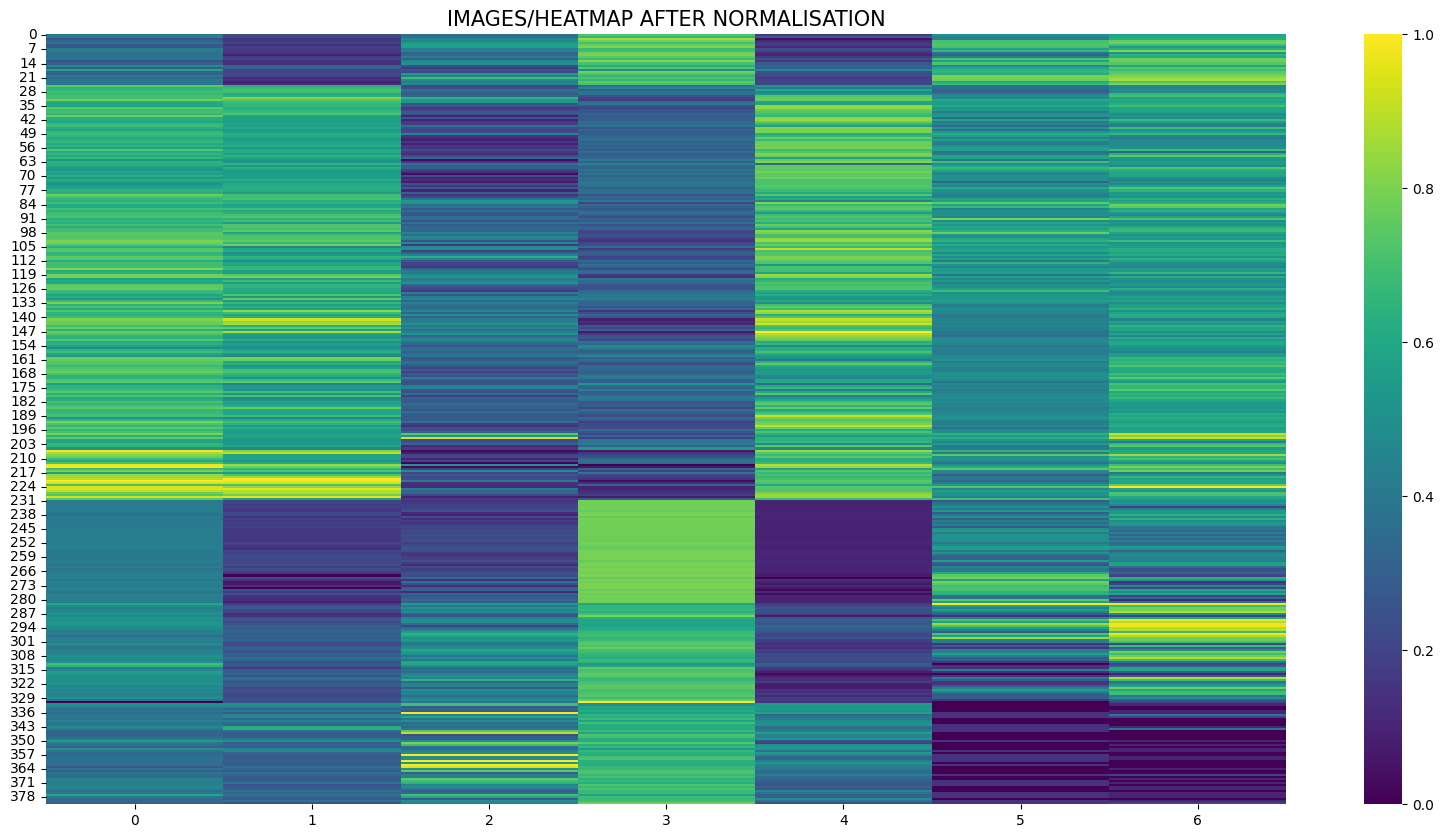

In [74]:
plt.figure(figsize=(20,10))

sns.heatmap(dfNorm, cbar=True, cmap='viridis')

plt.title('IMAGES/HEATMAP AFTER NORMALISATION', fontsize=15)

Data normalization helps align the relationships between attributes, making patterns easier to detect regardless of their raw scale.  

A clear example is the **inverse correlation of oleic acid** (4th column) with **palmitic** (0), **palmitoleic** (1), and **linoleic** (4). In the heatmap, rows that appear more intense for these three acids are noticeably darker in the oleic column, and vice versa. This contrast would have been much harder to see without normalization.  

Normalization also reveals that the **similarity between eicosanoic and linolenic acids** (last two columns) decreases slightly. While some resemblance remains (especially in the last observations) less pronounced. This is consistent with the scatter matrix where no strong correlation emerged.  

Finally, we see that **stearic acid** stands out as the most homogeneous variable, showing far fewer bright rows. By contrast, the last two acids display stronger variations across observations.

**CORRELATION MATRIX**

The **correlation matrix** shows the linear relationships between all pairs of variables in the dataset.  
Each cell contains the correlation coefficient, ranging from **-1 to +1**:

- Values close to **+1** → strong positive correlation  
- Values close to **-1** → strong negative correlation  
- Values around **0** → little or no linear correlation  

The matrix is symmetric and the diagonal always equals **1**, since each variable is perfectly correlated with itself.  

---

#### Formal Definition

The correlation coefficient $\rho_{X,Y}$ between two variables $X=(x_1,...,x_n)^T$ and $Y=(y_1,...,y_n)^T$ is defined as:

$$
\rho_{X,Y} = \frac {Cov(X,Y)}{\sigma_X \cdot \sigma_Y}
$$

where the covariance is:

$$
Cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})
$$

- $Cov(X,Y) > 0 \ \Longrightarrow \ X$ and $Y$ tend to increase together (positive relation)  
- $Cov(X,Y) < 0 \ \Longrightarrow \ X$ increases while $Y$ decreases, or vice versa (negative relation)  
- $Cov(X,Y) \approx 0 \ \Longrightarrow$ no evident linear relationship  

The sample means are:

$$
\bar{x}=\sum_{i=1}^{n}x_i, \quad \bar{y}=\sum_{i=1}^{n}y_i
$$

and the sample standard deviations are:

$$
\sigma_X=\sqrt{\frac{1}{n-1} \sum_{i=1}^n(x_i-\bar{x})^2}, \quad 
\sigma_Y=\sqrt{\frac{1}{n-1} \sum_{i=1}^n(y_i-\bar{y})^2}
$$

A small standard deviation means the data are close to the mean, while a large one indicates high variability.

---

#### Why It Matters

This analysis is useful for:  
- Identifying strong relationships between variables  
- Detecting redundancy in highly correlated features  
- Guiding variable selection in statistical or machine learning models  

When paired with a **heatmap**, correlation patterns become visually clear through color intensity.  

---

#### Coefficient of Determination

By squaring the correlation coefficients, we obtain the **coefficient of determination ($\rho^2$):**

- $0 \leq \rho^2 \leq 1$  
- Represents the proportion of shared variance between two variables  
- Removes the sign of the correlation, but highlights the **strength** of the relationship  

This makes $\rho^2$ especially useful for exploratory analysis, as it quantifies how much one variable “explains” another, regardless of direction.


Text(0.5, 1.0, 'SQUARE CORRELATION MATRIX')

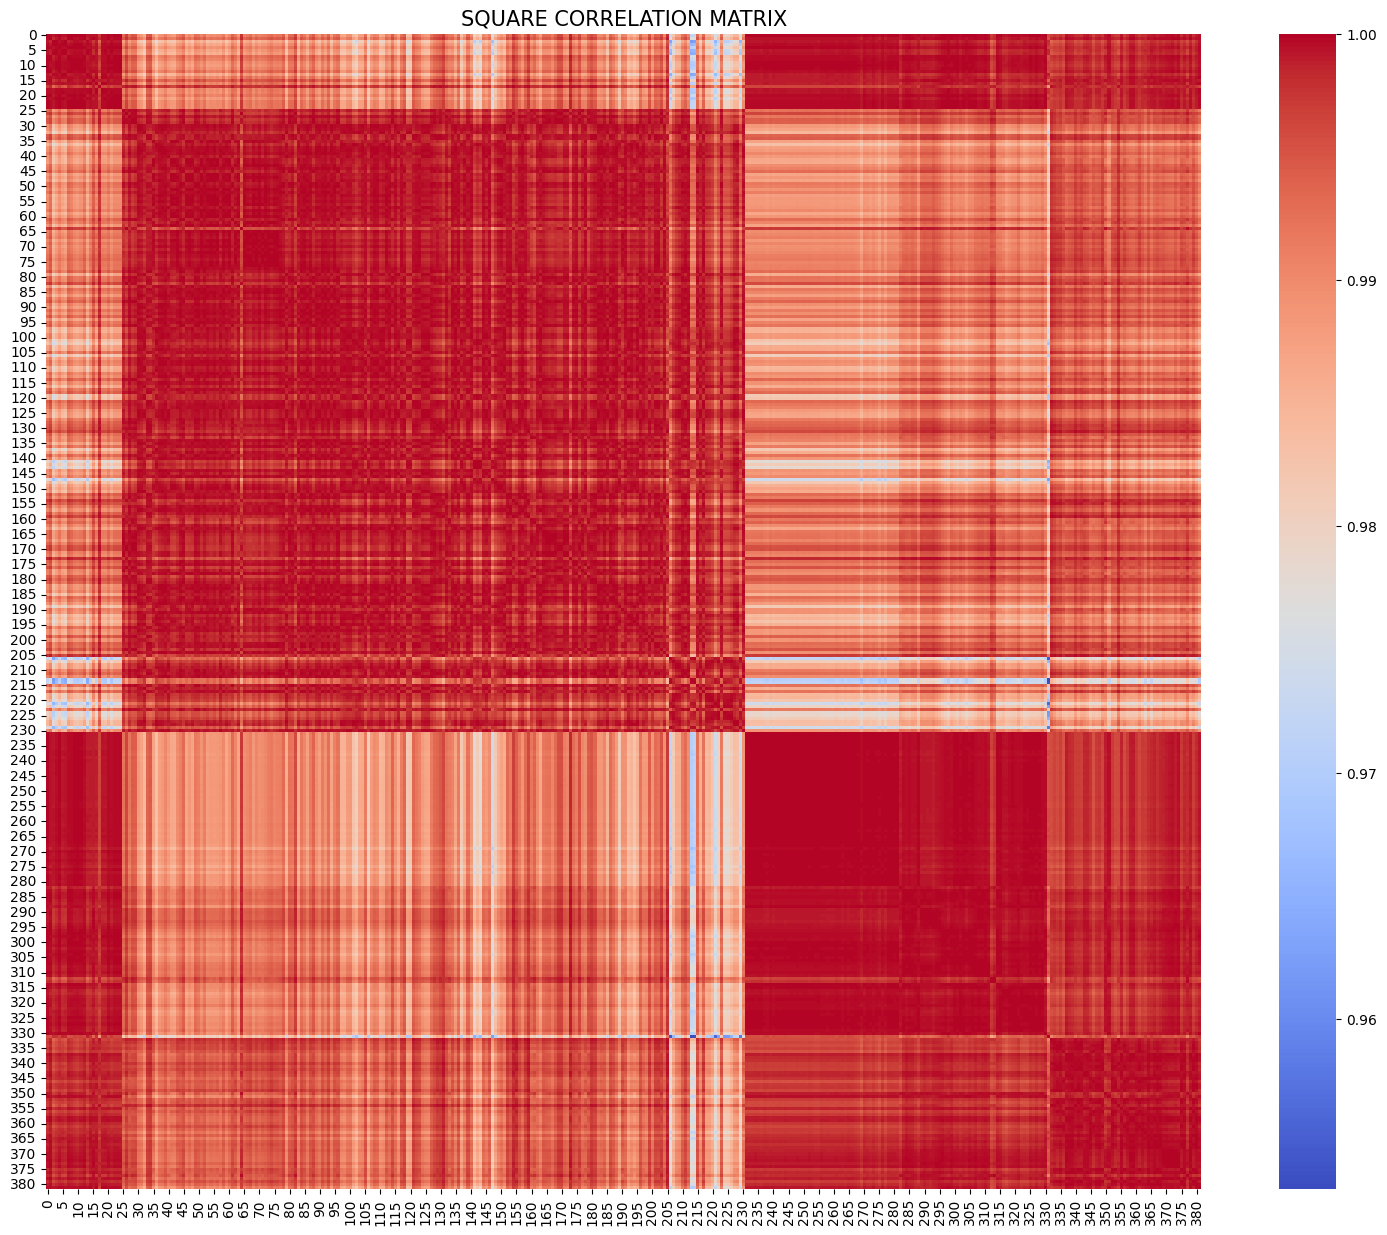

In [75]:
dfNum = df.drop(columns='Categorie', axis=1)

corr_matrix = np.corrcoef(dfNum)

corr_matrix_squared = corr_matrix ** 2

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix_squared, cmap='coolwarm', square=True, cbar=True)

plt.title('SQUARE CORRELATION MATRIX', fontsize=15)

The correlation matrix highlights the strength and direction of linear relationships between variables. Squared correlation values make strong relationships even more evident, allowing us to quickly spot significant associations: values close to **1** indicate strong correlations, while those near **0** suggest weak or no correlation.  

In our case, correlations are generally very strong, as shown by the dominance of red in the heatmap. The blue tones on the color bar still start above 0.95, which confirms a consistently high level of association across variables.  

Looking at the dataset structure, certain blocks of consecutive observations show particularly high correlations, forming clear macro-clusters:  
- From observation **30 to 230**, matching the region where the "oleic well" appears  
- From **0 to 30**, **230 to 330**, and **330 to the end**  

This pattern suggests that fatty acid concentrations were likely not randomized across samples, but grouped sequentially by region. If so, the dataset may be **imbalanced**, as cluster sizes are uneven, suggesting there may be more groups than initially assumed. This aspect deserves further investigation.

In [76]:
df['Categorie'].value_counts()

Categorie
SA    206
U      51
EL     50
WL     50
NA     25
Name: count, dtype: int64

The dataset shows a clear imbalance: more than 200 olive oil samples come from **Southern Apulia (SA)**, while the other regions contribute only around 50 samples each. **Northern Apulia (NA)** is particularly underrepresented, with just 25 observations.  

This uneven distribution means that analyses will naturally be biased toward Southern Apulia, making patterns from smaller groups harder to detect. At first, the lower number of blue points in scatter plots seemed due to overlap, but it is now evident that the issue lies in the limited sample size. On the map, the small cluster corresponds to **NA oils**, while the much larger one represents **SA oils**.